- We hope quantify DNA damage signal distribution in heterochromatin and euchromatin(similar as MCM signls) 
- To save imaging time, we will image one slice instead of a Z stacks. And the image will be much bigger and including hundreds of cells instead of single cells. 
- One of challenges will be how can we give each of cell a name in the same image so that we can match them with their growth history


In [1]:
import pandas as pd
import numpy as np
from skimage.external import tifffile
from skimage.external.tifffile import imread

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join


In [2]:
import time

In [3]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\dna damage doodle'

In [4]:
file=f'{bigDir}\\data_tiff\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #01.tif'

In [5]:
scan=imread(file)

In [6]:
scan.shape

(3, 1024, 1024)

In [7]:
dna=scan[1,:,:]

<IPython.core.display.Javascript object>


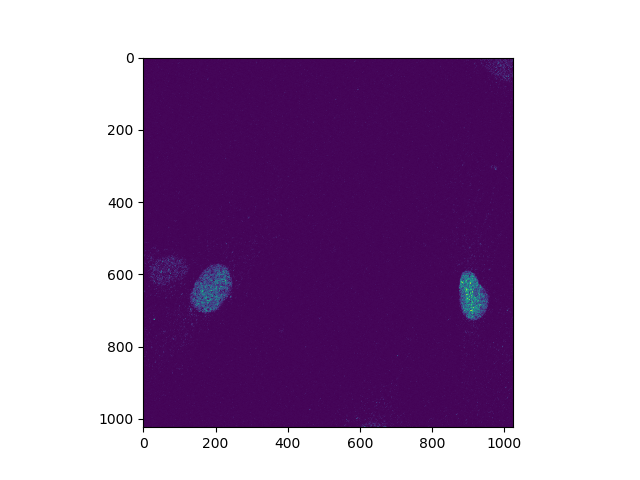

In [8]:
%matplotlib notebook
plt.imshow(dna)

In [9]:
file_mask=f'{bigDir}\\segmentation_nucleus_Otsu\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #01_nucleus.tif'

In [10]:
nucMask=imread(file_mask)

In [11]:
nucMask.shape

(1024, 1024)

In [12]:
nucMask=nucMask.astype(bool)

In [13]:
dna.shape

(1024, 1024)

In [14]:
dna[~nucMask]=0

In [15]:
dna.shape

(1024, 1024)

<IPython.core.display.Javascript object>


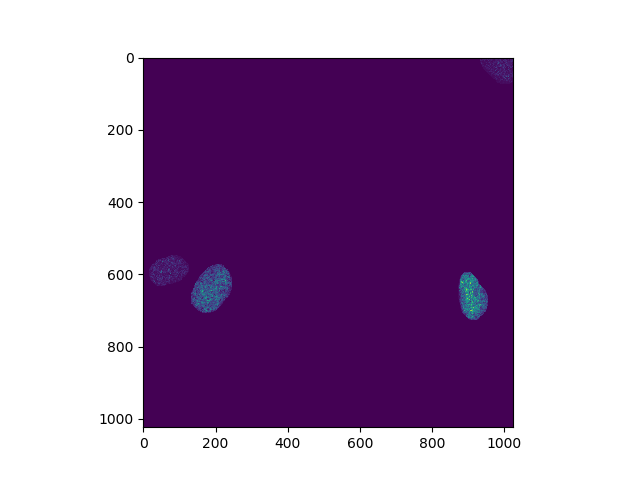

In [16]:
%matplotlib notebook 
plt.imshow(dna)

In [17]:
dna1=dna.copy()

In [18]:
dna1=np.zeros(dna.shape)

In [19]:
dna1=dna[550:750,800:1000]

<IPython.core.display.Javascript object>


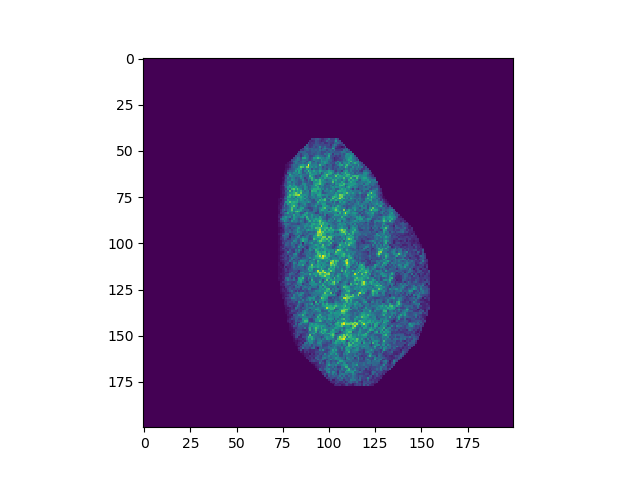

In [20]:
%matplotlib notebook 
plt.imshow(dna1)

In [21]:
def find_xy(img):
    %matplotlib notebook
    pos=[]
    
    ax = plt.gca()
    fig = plt.gcf()
    implot = ax.imshow(img)
    plt.show()
    
    def onclick(event):
        if event.xdata != None and event.ydata != None:
            pos.append(event.xdata)
            pos.append(event.ydata)
    fig.canvas.mpl_connect('button_press_event', onclick)
        
    return pos
    

<IPython.core.display.Javascript object>


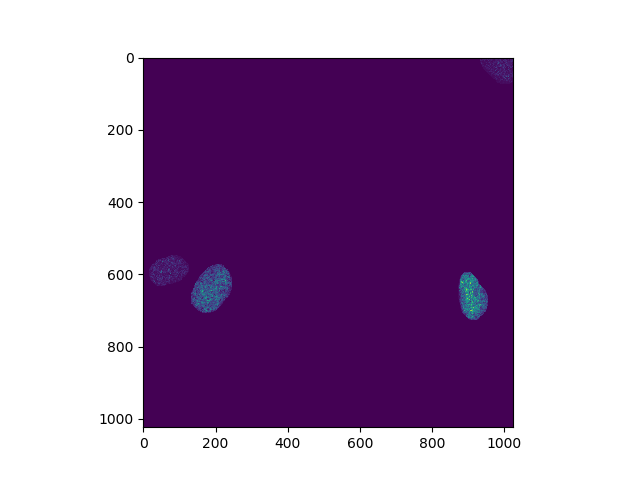

In [22]:
pos=find_xy(dna)

In [23]:
pos

[]

In [24]:
def make_ind_file1(img,x,y,path,number):
    shape=img.shape
    
    x=x.astype(int)
    y=y.astype(int)
    
    if x-100 < 0:
        x_lower=0
    else:
        x_lower = x-100
        
    if y-100<0:
        y_lower=0
    else:
        y_lower=y-100
        
    if x+100 > shape[0]:
        x_upper=shape[0]
    else:
        x_upper=x+100
        
    if y+100>shape[1]:
        y_upper=shape[1]
    else:
        y_upper=y+100
    
    result=img[y_lower:y_upper,x_lower:x_upper]
    
    
    newSegFolder = os.path.dirname(path).replace('data_tiff','ind_files')
    try:
        os.mkdir(newSegFolder)
    except:
        pass
    maskFile = os.path.basename(path).replace('.tif',f'_{number}.tif')
    tifffile.imsave(os.path.join(newSegFolder,maskFile), result)

<IPython.core.display.Javascript object>


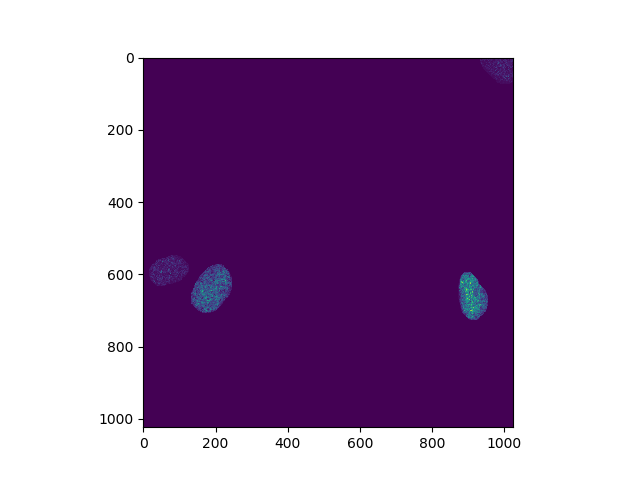

In [25]:
im1pos=find_xy(dna)

In [28]:
im1pos

[187.2575757575757, 630.8246753246752]

In [29]:
im1=make_ind_file1(dna,im1pos[0],im1pos[1],file,1)

In [30]:
newfile=file.replace('data_tiff','ind_files')
newfile=newfile.replace('.tif','_1.tif')

In [31]:
im1=imread(newfile)

<IPython.core.display.Javascript object>


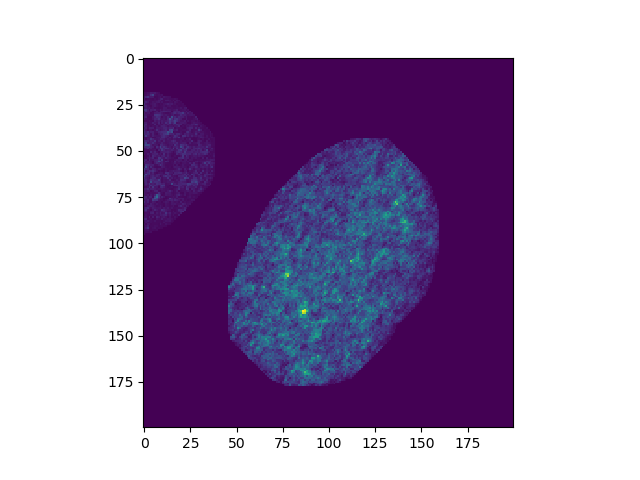

In [32]:
%matplotlib notebook
plt.imshow(im1)

In [33]:
cellSegNumbers=np.arange(1,25)

In [34]:
numbers=np.arange(1,3)

In [35]:
def segment_single_cells(cellSegNum,numbers):
    %matplotlib notebook
    cellFile=f'{bigDir}\\data_tiff\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #0{cellSegNum}.tif'
    file_mask=f'{bigDir}\\segmentation_nucleus_Otsu\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #0{cellSegNum}_nucleus.tif'
    
    img=imread(cellFile)
    mask=imread(file_mask)
    mask=mask.astype(bool)
    
    dna=img[1,:,:]
    
    dna[~nucMask]=0
    pos=find_xy(dna)
    
    return pos,cellFile

<IPython.core.display.Javascript object>


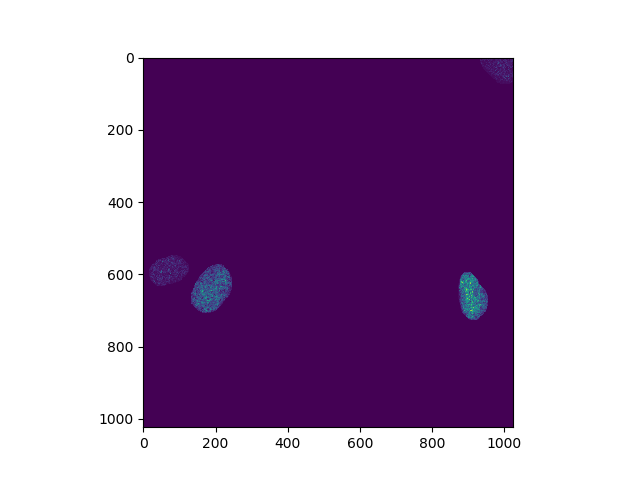

In [36]:
pos=segment_single_cells(cellSegNumbers[0],numbers)

In [37]:
pos

([62.58225108225099,
  590.8246753246752,
  184.48701298701297,
  637.9242424242423,
  904.8333333333335,
  654.5476190476189],
 'Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\dna damage doodle\\data_tiff\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #01.tif')

In [38]:
make_ind_file1(dna,pos[0],pos[1],cellFile,1)

NameError: name 'cellFile' is not defined

In [80]:
for num in range(int(np.floor(len(pos)/2))):
    print (num)

0
1
2
3


In [98]:
i=0

In [45]:
from IPython.display import display, clear_output
import ipywidgets as widgets

button = widgets.Button(description="next image")
output = widgets.Output()

display(button, output)
i=1
%matplotlib notebook
def on_button_clicked(b):
    
    with output:
        clear_output()
        global i
    
        cellFile=f'{bigDir}\\data_tiff\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #{i}.tif'
        file_mask=f'{bigDir}\\segmentation_nucleus_Otsu\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #{i}_nucleus.tif'
    
        img=imread(cellFile)
        mask=imread(file_mask)
        mask=mask.astype(bool)
    
        dna=img[1,:,:]
    
        dna[~nucMask]=0
        pos=find_xy(dna)
        print(i)
        i+=1

    button2=widgets.Button(description="segmentation ready!")
    output2=widgets.Output()

    display(button2,output2)

    def on_button_clicked2(b):
        with output2:
            clear_output()
            for num in range(int(np.floor(len(pos)/2))):
                make_ind_file1(dna,pos[num],pos[num+1],cellFile,num)
    

    button2.on_click(on_button_clicked2)
   

button.on_click(on_button_clicked)



Button(description='next image', style=ButtonStyle())

Output()

Button(description='segmentation ready!', style=ButtonStyle())

Output()

Button(description='segmentation ready!', style=ButtonStyle())

Output()

In [89]:
file=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\dna damage doodle\ind_files\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #01_1.tif'

In [90]:
img=imread(file)

<IPython.core.display.Javascript object>


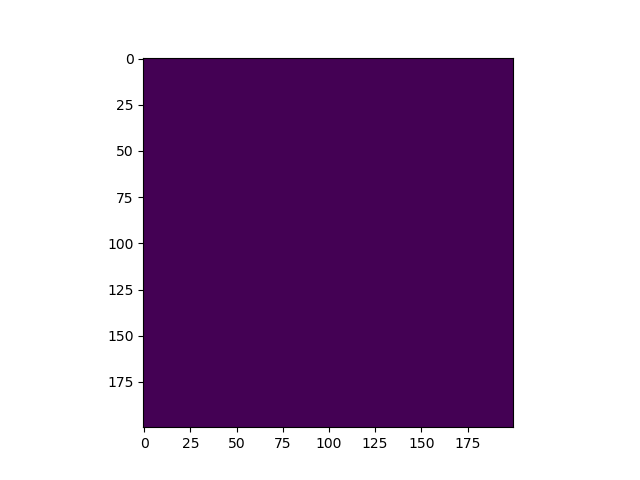

In [91]:
%matplotlib notebook
plt.imshow(img)

In [46]:
cellFile=f'{bigDir}\\data_tiff\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #2.tif'
file_mask=f'{bigDir}\\segmentation_nucleus_Otsu\\20201030_xy25_tailscan.czi - 20201030_xy25 full frame #2_nucleus.tif'

img=imread(cellFile)
mask=imread(file_mask)
mask=mask.astype(bool)

dna=img[1,:,:]

dna[~nucMask]=0

In [51]:
img.shape

(3, 1024, 1024)

<IPython.core.display.Javascript object>


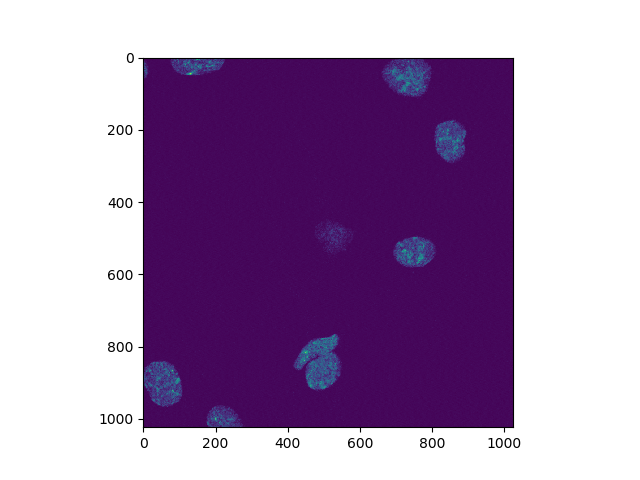

In [55]:
%matplotlib notebook
plt.imshow(img[0,:,:])

# update on 12/31/2020 - stitched all the tiles on fiji

In [5]:
cellFile=f'{bigDir}\\data_tiff\\20201030_xy25_tailscan.tif'
file_mask=f'{bigDir}\\segmentation_nucleus_Otsu\\20201030_xy25_tailscan_nucleus.tif'

img=imread(cellFile)
mask=imread(file_mask)
mask=mask.astype(bool)

dna=img[1,:,:]

In [6]:
img.shape

(3, 5120, 5120)

In [7]:
mask.shape

(5120, 5120)

<IPython.core.display.Javascript object>


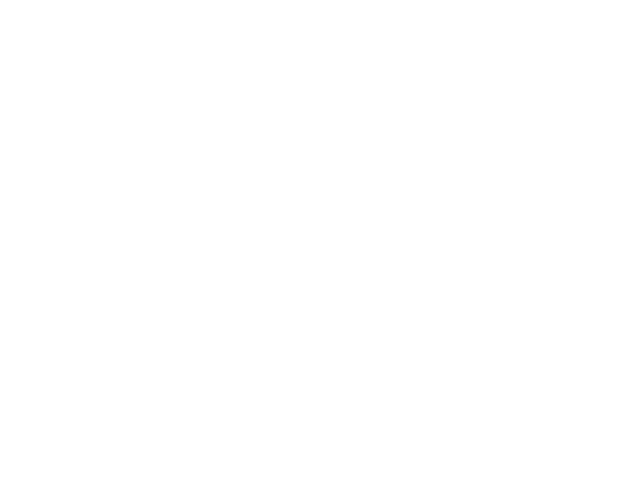

In [8]:
%matplotlib notebook
plt.imshow(dna)

In [9]:
dna[~mask]=0

<IPython.core.display.Javascript object>


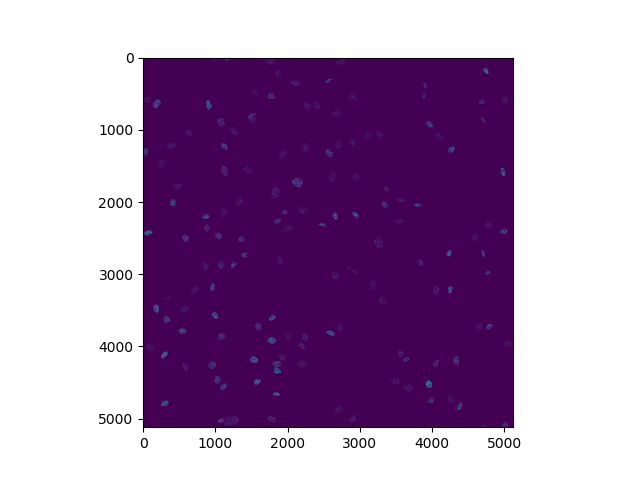

In [10]:
%matplotlib notebook
plt.imshow(dna)

<IPython.core.display.Javascript object>


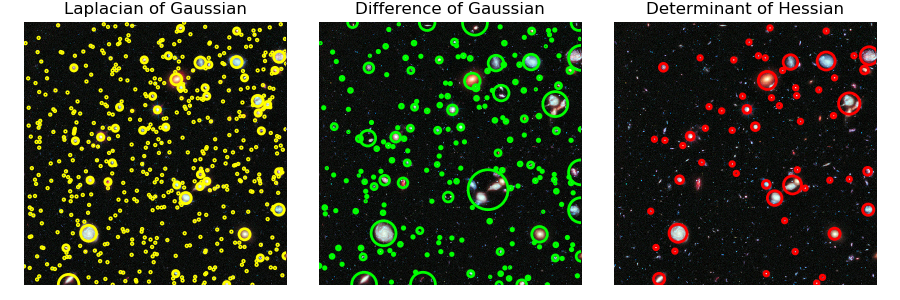

In [65]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


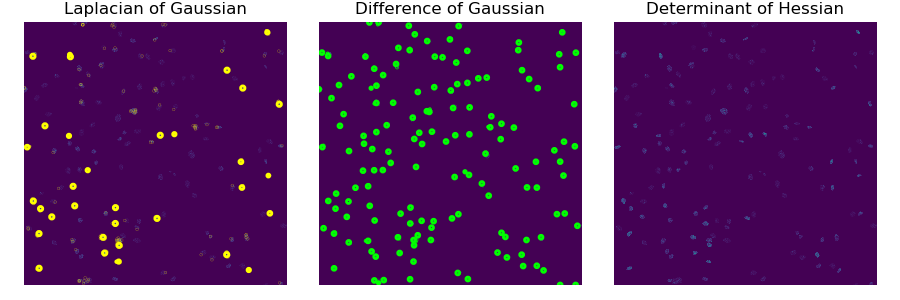

Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian of Gaussian
Laplacian 

In [11]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image_gray = rgb2gray(dna)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(dna)
    for blob in blobs:
        print(title)
        y,x,r=blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [12]:
blobs_dog.shape

(159, 3)

<IPython.core.display.Javascript object>


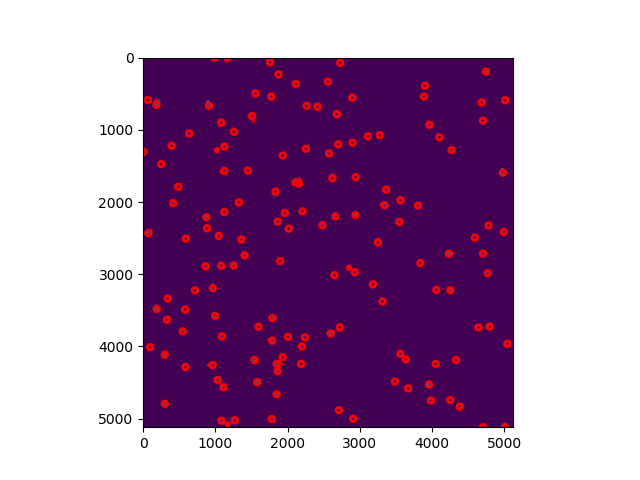

In [33]:
%matplotlib notebook
fig,ax=plt.subplots()
ax.imshow(dna)
for blob in blobs_dog:
    y,x,r=blob
    c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
    ax.add_patch(c)
fig.show()

In [14]:
radius=[]
for blob in blobs_dog:
    y,x,r=blob
    radius.append(r)
    

In [15]:
from scipy import stats
stats.describe(radius)

DescribeResult(nobs=159, minmax=(2.2627416997969525, 37.96250624970064), mean=34.50757256929834, variance=94.0662358135772, skewness=-2.5509845646749203, kurtosis=4.7219589573578284)

In [16]:
blobs_dogdf=pd.DataFrame(blobs_dog)

In [18]:
blobs_dogdf.head()

,0,1,2
0,5119.0,5009.0,37.962506
1,5119.0,4707.0,37.962506
2,5079.0,1167.0,23.726566
3,5030.0,1084.0,37.962506
4,5024.0,1268.0,37.962506


In [23]:
shape=dna.shape

In [32]:
for index,blob in blobs_dogdf.iterrows():
    y,x,r=blob
    if r >5:
        x=int(x)
        y=int(y)

        if x-100 < 0:
            x_lower=0
        else:
            x_lower = x-100

        if y-100<0:
            y_lower=0
        else:
            y_lower=y-100

        if x+100 > shape[0]:
            x_upper=shape[0]
        else:
            x_upper=x+100

        if y+100>shape[1]:
            y_upper=shape[1]
        else:
            y_upper=y+100

        result=dna[y_lower:y_upper,x_lower:x_upper]

        
        newSegFolder = os.path.dirname(cellFile).replace('data_tiff','ind_files')
        try:
            os.mkdir(newSegFolder)
        except:
            pass
        maskFile = os.path.basename(cellFile).replace('.tif',f'_{index}.tif')
        tifffile.imsave(os.path.join(newSegFolder,maskFile), result)
        
        print(x,y)
    

5009 5119
4707 5119
1167 5079
1084 5030
1268 5024
1781 5007
2908 5003
2711 4884
4384 4835
299 4794
3986 4750
4252 4744
1848 4663
3669 4582
1111 4566
3957 4528
1578 4496
3486 4487
1031 4465
1859 4345
585 4289
1873 4283
1896 4274
962 4259
914 4259
1909 4243
1849 4243
4051 4242
2186 4242
1884 4211
1544 4189
4334 4188
3639 4182
1931 4150
298 4117
3564 4102
94 4012
2199 4001
5043 3965
1784 3920
2240 3875
2006 3868
1090 3862
2598 3821
547 3791
2723 3739
4644 3738
1596 3728
4797 3725
327 3631
1789 3610
995 3576
580 3491
186 3481
3314 3378
339 3337
716 3223
4253 3220
4061 3217
963 3194
3181 3141
2649 3014
4772 2986
2930 2973
2852 2912
863 2890
1080 2882
1250 2879
3839 2847
1897 2817
1403 2739
4235 2717
4707 2714
3252 2558
1358 2520
590 2508
4594 2494
1044 2469
71 2431
4994 2415
97 2397
2015 2370
883 2365
4782 2325
2482 2322
3548 2276
1863 2272
875 2212
2662 2200
2938 2182
1960 2151
1124 2138
2207 2130
3805 2050
3343 2044
3303 2036
414 2016
1325 2004
3563 1975
1833 1857
3365 1830
485 1788
2156 

<IPython.core.display.Javascript object>


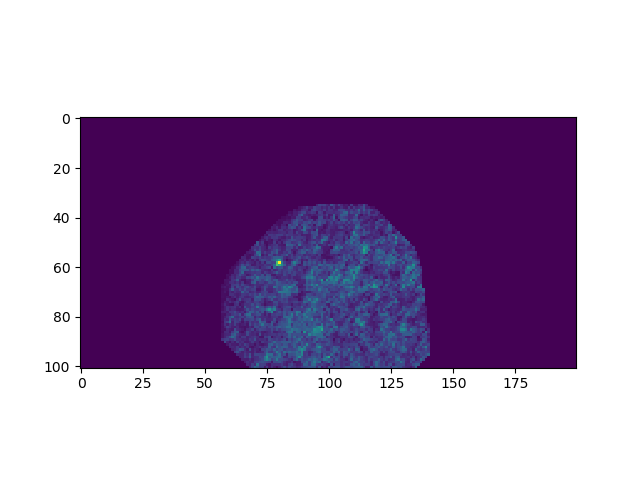

In [30]:
%matplotlib notebook
plt.imshow(result)

#### note 1/5
- was able to find the algorithm that will detect the 'blobs' and segment the "legitimate" blobs and save as individual files.
- how i defined "legitimate" blobs
    - If a blob had a radius smaller than 5 pixels, I didn't consider them to segmane and save them as file
    - (for right now, this this the only condition for choosing the blobs correctly)
   
##### what I wish to fix
- not consider any cells that seem to be cut in the image (like the cell #0)
